In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import MinMaxScaler

In [ ]:
### Attempt logistic regression on Titanic Survival dataset
### 1) Fit the model
### 2) Cross validation
### 3) Accuracy score
### 4)onfusion Matrix

In [3]:
torig = pd.read_csv('train.csv', index_col=0)

print(torig.shape)
torig.head()

(891, 11)


,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
torig.columns

Index(['Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket',
       'Fare', 'Cabin', 'Embarked'],
      dtype='object')

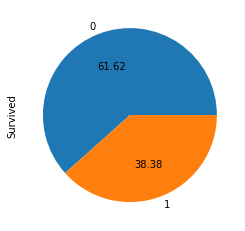

In [5]:
# 0 == Dead 1 == Survived
torig.Survived.value_counts().plot(kind='pie', autopct='%.2f')
plt.show()

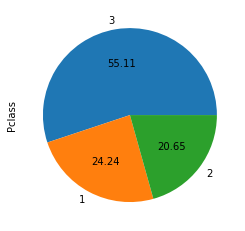

In [6]:
torig.Pclass.value_counts().plot(kind='pie', autopct='%.2f')

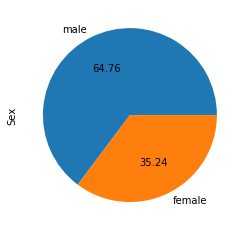

In [7]:
torig.Sex.value_counts().plot(kind='pie', autopct='%.2f')

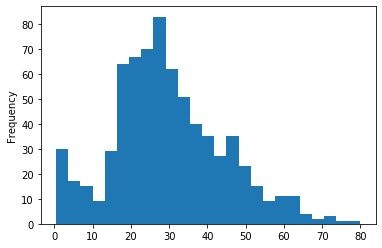

In [8]:
torig.Age.plot(kind='hist', bins=25)

count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: Fare, dtype: float64


[]

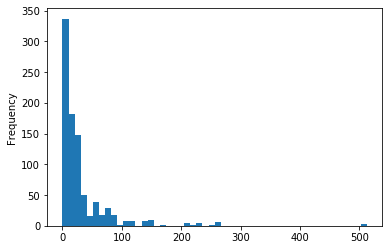

In [9]:
print(torig.Fare.describe())
torig.Fare.plot(kind='hist', bins=50)
plt.plot()

In [10]:
torig.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 11 columns):
Survived    891 non-null int64
Pclass      891 non-null int64
Name        891 non-null object
Sex         891 non-null object
Age         714 non-null float64
SibSp       891 non-null int64
Parch       891 non-null int64
Ticket      891 non-null object
Fare        891 non-null float64
Cabin       204 non-null object
Embarked    889 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB


## Preprocessing

In [48]:
tedit = torig.copy()

In [49]:
dclass = pd.get_dummies(tedit.Pclass, prefix='Pclass', drop_first=True)

dclass.head(2)

,Pclass_2,Pclass_3
PassengerId,,
1,0,1
2,0,0


In [50]:
dsex = pd.get_dummies(tedit.Sex, prefix='Sex', drop_first=True)

dsex.head(2)

,Sex_male
PassengerId,
1,1
2,0


[]

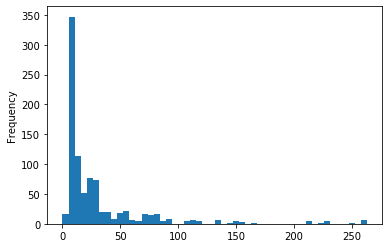

In [51]:
tedit = tedit[tedit.Fare <= 300]

tedit.Fare.plot(kind='hist', bins=50)
plt.plot()

In [52]:
tedit.Embarked.value_counts()

S    644
C    165
Q     77
Name: Embarked, dtype: int64

In [53]:
tedit.Embarked.fillna(tedit.Embarked.mode()[0], inplace=True)

tedit.Embarked.value_counts()

S    646
C    165
Q     77
Name: Embarked, dtype: int64

In [54]:
dembarked = pd.get_dummies(tedit.Embarked, prefix='Embarked')
dembarked.drop(columns=['Embarked_S'], inplace=True)

dembarked.head(2)

,Embarked_C,Embarked_Q
PassengerId,,
1,0,0
2,1,0


In [55]:
def ticket_clean(x):
#     if x.isupper() or x.islower():
#         return "".join(re.findall("[a-zA-Z]+", x)).upper()
#     else:
    num = "".join(re.findall("[0123456789]+", x))
    if num == '':
        return "".join(re.findall("[a-zA-Z]+", x)).upper()
    else:
        return round(int(num), -(len(str(num))-1))

In [56]:
tedit.Ticket = tedit.Ticket.apply(ticket_clean)

print(f'# of unique ticket types: {len(tedit.Ticket.unique())}')
print(tedit.Ticket.value_counts()[:5])

# of unique ticket types: 27
300000    178
400000    107
20000      98
200000     73
100000     72
Name: Ticket, dtype: int64


In [57]:
dticket = pd.get_dummies(tedit.Ticket, prefix='Ticket')
dticket.drop(columns=['Ticket_300000'], inplace=True)

dticket.head(2)

,Ticket_3,Ticket_500,Ticket_700,Ticket_800,Ticket_1000,Ticket_2000,Ticket_3000,Ticket_4000,Ticket_5000,Ticket_6000,...,Ticket_40000,Ticket_50000,Ticket_70000,Ticket_100000,Ticket_200000,Ticket_400000,Ticket_500000,Ticket_3000000,Ticket_20000000,Ticket_LINE
PassengerId,,,,,,,,,,,,,,,,,,,,,
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [58]:
ttarget = tedit.Survived
tedit = tedit[['Age', 'Fare']] # exclude 'SibSp', 'Parch'

tedit.head(2)

,Age,Fare
PassengerId,,
1,22.0,7.2500
2,38.0,71.2833


In [59]:
tedit.Age.fillna(tedit.Age.mean(), inplace=True)

tedit.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 888 entries, 1 to 891
Data columns (total 2 columns):
Age     888 non-null float64
Fare    888 non-null float64
dtypes: float64(2)
memory usage: 20.8 KB


In [60]:
tedit = tedit.join(dclass)
tedit = tedit.join(dsex)
tedit = tedit.join(dticket)
# tedit = tedit.join(dembarked) # chose to exclude Embarked

tedit.head()

,Age,Fare,Pclass_2,Pclass_3,Sex_male,Ticket_3,Ticket_500,Ticket_700,Ticket_800,Ticket_1000,...,Ticket_40000,Ticket_50000,Ticket_70000,Ticket_100000,Ticket_200000,Ticket_400000,Ticket_500000,Ticket_3000000,Ticket_20000000,Ticket_LINE
PassengerId,,,,,,,,,,,,,,,,,,,,,
1,22.0,7.2500,0,1,1,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
2,38.0,71.2833,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,26.0,7.9250,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,35.0,53.1000,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
5,35.0,8.0500,0,1,1,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0



## ML

In [61]:
### Current performance score:
### Score of training group: 0.80
### Score of test group: 0.85

### Original performance score:
### Score of training group: 0.80
### Score of test group: 0.81

In [62]:
tedit.shape

(888, 31)

In [63]:
x_train, x_test, y_train, y_test = train_test_split(tedit, ttarget, test_size=0.2)

print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

(710, 31) (178, 31) (710,) (178,)


In [64]:
lr = LogisticRegression(fit_intercept=True, solver='lbfgs', max_iter=1000)

In [65]:
lr.fit(x_train, y_train)
print(lr.coef_, lr.intercept_)

[[-3.21366315e-02 -1.82908826e-03 -1.13425077e+00 -2.19297865e+00
  -2.44671514e+00 -2.11361723e-01  2.05175233e-01 -3.98950384e-01
   1.14337079e+00 -9.15799564e-02  5.90575057e-01  8.40669582e-01
  -4.83249387e-01 -4.69956063e-02 -2.26751758e-01 -7.47589386e-01
  -3.84191468e-01  4.21221588e-01  8.67293745e-01  6.82774677e-01
   3.78355780e-01  6.45728023e-01 -5.68482671e-01  6.25448040e-01
   2.83218055e-01  4.56060755e-01  2.52284267e-01  2.94271182e-01
  -1.19875421e-01  1.19208991e+00  5.42992092e-01]] [3.04344266]


In [66]:
y_pred = lr.predict(x_test)

y_pred[:5]

array([1, 0, 1, 0, 1], dtype=int64)

In [67]:
y_prob = lr.predict_proba(x_test)

y_prob[:5]

array([[0.48613215, 0.51386785],
       [0.90519773, 0.09480227],
       [0.06113457, 0.93886543],
       [0.84524959, 0.15475041],
       [0.39179903, 0.60820097]])

### Accuracy Score

In [68]:
# score == mean accuracy
# test.csv also available for another test
print ('Score of training group: {0:2.2f}'.format(lr.score(x_train, y_train)))
print ('Score of test group: {0:2.2f}'.format(lr.score(x_test, y_test)))

Score of training group: 0.80
Score of test group: 0.85


In [69]:
# same as score above
corrects = np.count_nonzero(y_test == y_pred)
incorrects = np.count_nonzero(y_test != y_pred)

print(corrects, incorrects)
print('Model accuracy on test grup: {:3.2f}'.format(corrects/(corrects+incorrects)))

152 26
Model accuracy on test grup: 0.85


In [70]:
cv = cross_val_score(lr, tedit, ttarget, cv=10)
print ('Mean score is: {0:2.2f}'.format(cv.mean()))

Mean score is: 0.80


### Confusion Matrix

In [34]:
# tn, fp, fn, tp
confusion_matrix(y_test, y_pred)

array([[89, 18],
       [19, 52]], dtype=int64)

In [35]:
confusion_matrix(y_test, y_pred).ravel()

array([89, 18, 19, 52], dtype=int64)

## Normalize for ML

In [36]:
min_max_scaler = MinMaxScaler()

In [37]:
t_scaled = min_max_scaler.fit_transform(tedit)

C:\Users\liamk\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:334: DataConversionWarning: Data with input dtype uint8, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


In [38]:
t_scaled = pd.DataFrame(t_scaled)

t_scaled.head(2)

,0,1,2,3,4,5,6,7,8,9,...,21,22,23,24,25,26,27,28,29,30
0,0.271174,0.027567,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,0.472229,0.271039,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [39]:
x_train, x_test, y_train, y_test = train_test_split(t_scaled, ttarget, test_size=0.2)

print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

(710, 31) (178, 31) (710,) (178,)


In [40]:
lr.fit(x_train, y_train)

y_pred = lr.predict(x_test)

In [41]:
### normalization did not improve performance
# score == mean accuracy
print ('Score of training group: {0:2.2f}'.format(lr.score(x_train, y_train)))
print ('Score of test group: {0:2.2f}'.format(lr.score(x_test, y_test)))

Score of training group: 0.80
Score of test group: 0.80


In [42]:
len(torig.Ticket.value_counts())

681

In [43]:
torig.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 11 columns):
Survived    891 non-null int64
Pclass      891 non-null int64
Name        891 non-null object
Sex         891 non-null object
Age         714 non-null float64
SibSp       891 non-null int64
Parch       891 non-null int64
Ticket      891 non-null object
Fare        891 non-null float64
Cabin       204 non-null object
Embarked    889 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB


## Stochastic Gradient Descent

In [71]:
lrsgd = SGDClassifier(loss = 'log', fit_intercept=True, max_iter = 5000)

In [72]:
### SGD performance worse than logreg in this case
sgdcv = cross_val_score(lrsgd, tedit, ttarget, cv=5)
print ('SGD Mean score is: {0:2.2f}'.format(sgdcv.mean()))

C:\Users\liamk\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:183: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If max_iter is set but tol is left unset, the default value for tol in 0.19 and 0.20 will be None (which is equivalent to -infinity, so it has no effect) but will change in 0.21 to 1e-3. Specify tol to silence this warning.
  FutureWarning)
C:\Users\liamk\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:183: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If max_iter is set but tol is left unset, the default value for tol in 0.19 and 0.20 will be None (which is equivalent to -infinity, so it has no effect) but will change in 0.21 to 1e-3. Specify tol to silence this warning.
  FutureWarning)
C:\Users\liamk\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:183: FutureWarning: max_iter and tol parameters have been added in SGDClassif

SGD Mean score is: 0.78
